Members
Kalema Moses
Nassali Fatumah
Mutabazi Victor Bwana

In this poject, we are faced with a dataset from a financial institution that seeks to leverage machine learning to determine whether a customer is eligible for a loan or not.
The dataset before us has a total of 13 features and 4269 data points. Since we are in possesion of a labelled dataset, we are to use supervised learning and since or outcome is binary in nature i.e approved or rejected we shall use KNN and Logistic regression to execute this project.
The next markdown contains the data dictionary for the dataset before us.

1	loan_id.....Unique identifier for each individual
2	no_of_dependent.....It tells whether the applicant has any dependents or not.
3	education.....It will tell us whether the applicant is Graduated or not.
4	self_employed....This defines that the applicant is self-employed i.e. Yes/ No
5	income_annum...This the amount of money an individual receives per year
6	loan_amount.......Loan amount (in thousands)
7	loan term.......Terms of loan (in months)
8	cibil_score......This states the applicant’s credit sore
9	residential_assets_value......The value of the applicant’s residential home
10	commercial_assets_value......The value of the applicant’s commercial assets
11	luxury_assets_value.......The value of the applicant’s luxury assets
12	bank_asset_value........The amount of money the applicant has on his/her bank account.
13	loan_status.........Status of Loan Approved or Rejected



ROLE PLAYED EACH MEMBER
Nassali Fatumah ............. Data Exploration
Mutabazi Victor..............Data Visualisation
Kalema Moses ................Model training and Evalution

In [127]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


In [128]:
#importing the data
df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [115]:
# checking for missing values and duplicates
df.shape
df.isnull().sum()
df.duplicated().sum()

0

In [130]:
#dropping loan_id
df.drop('loan_id',axis=1,inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


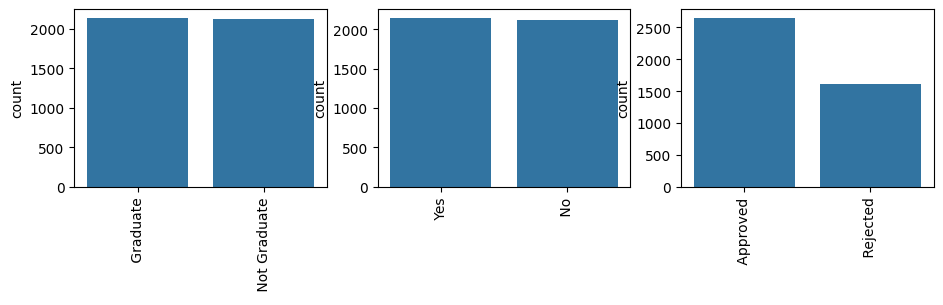

In [131]:
#creating bar graghs
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(15,30))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [132]:
#encoding categorical variables
encoder = OrdinalEncoder()
df[' education'] = encoder.fit_transform(df[[' education']])
df[' self_employed'] = encoder.fit_transform(df[[' self_employed']])
df[' loan_status'] = encoder.fit_transform(df[[' loan_status']])
df.head()




,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


In [133]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


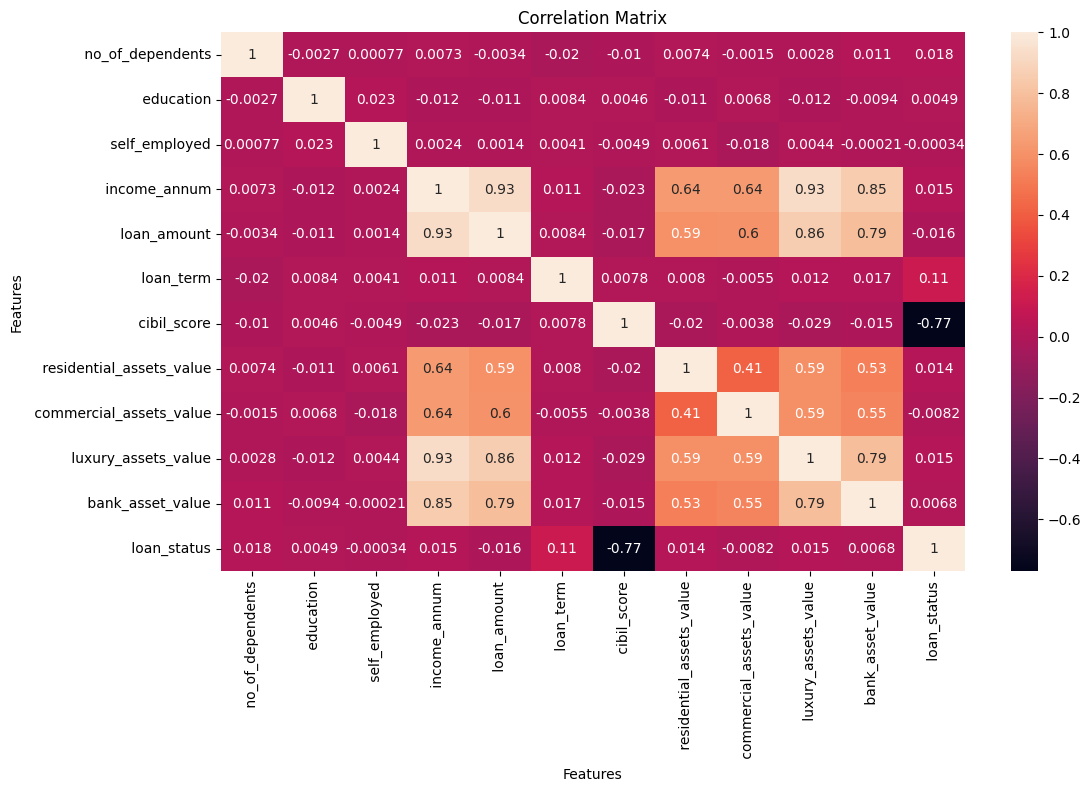

In [134]:
#correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True);
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix');

From the above heatmap, we note thT cibil is negatively correlated to loan status , meaning as that as CIBIL_score increases, the chances of an individual getting a loan decrease

In [135]:
#Assigning features to X and targets to Y
X = df.drop(' loan_status',axis=1)
Y = df[' loan_status']

In [136]:
#Splitting the data into the training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

MODEL TRAINING AND EVALUATION

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [139]:
#Instatiating the model
knn = KNeighborsClassifier(n_neighbors=3)
lc = LogisticRegression()

In [140]:
#Training the model
knn.fit(X_train,Y_train)
lc.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
#making predictions on the testing set
y_pred_knn = knn.predict(X_test)
y_pred_lc = lc.predict(X_test)

In [142]:
#making predictions on the train set
y_pred_train_knn = knn.predict(X_train)
y_pred_train_lc = lc.predict(X_train)

In [144]:
#evaluating the model
print(accuracy_score(Y_test,y_pred_knn))
print(accuracy_score(Y_train,y_pred_train_knn))
print(accuracy_score(Y_test,y_pred_lc))
print(accuracy_score(Y_train,y_pred_train_lc))


0.5597189695550351
0.7759882869692533
0.7295081967213115
0.7317715959004393


When we compare the results we note that logistic regression gives a higher acccuracy compared to K nearest neighbours. Therefore for our model we shall stick to logistic regression.